# Setup

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -------------- ------------------------ 61.4/162.8 kB 1.6 MB/s eta 0:00:01
     ---------------------- ---------------- 92.2/162.8 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.7 MB 5.8 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.7 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.7 MB 4.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.7 MB 4.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.7 MB 4.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.7 MB 4.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/7.7 MB 3.9 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/7.7 MB 4.1 MB/s eta 0:00:02
   -------

In [4]:
pip install statsmodels


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.1/9.8 MB 8.9 MB/s eta 0:00:02
    --------------------------------------- 0.1/9.8 MB 8.9 MB/s eta 0:00:02
   - -------------------------------------- 0.3/9.8 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.8 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.8 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   - ----------------

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Splint 3

In [6]:
s1 = pd.Series([1000,1200,1500,1300,1600,1400,1700,1800,2000,2200,2100,2300], name='Acessos')
s2 = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12], name='Mês')

In [7]:
df = pd.DataFrame({'Acessos': s1, 'Mês': s2})
df

,Acessos,Mês
0,1000,1
1,1200,2
2,1500,3
3,1300,4
4,1600,5
5,1400,6
6,1700,7
7,1800,8
8,2000,9
9,2200,10


In [8]:
df.shape

(12, 2)

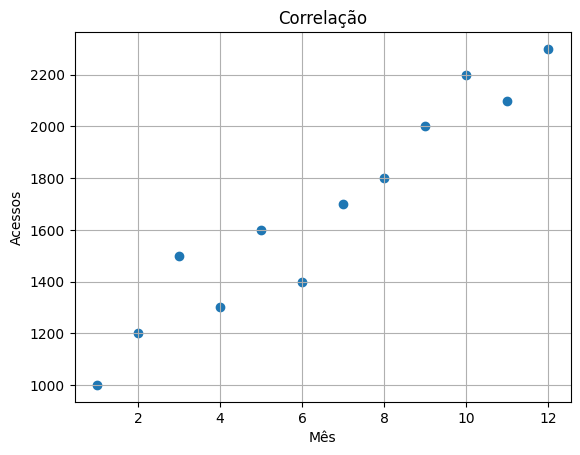

In [9]:
plt.scatter(df.Mês, df.Acessos)
plt.title('Correlação')
plt.xlabel('Mês')
plt.ylabel('Acessos')
plt.grid(True)
plt.show()

# Regressão Linear

In [10]:
# Criação do modelo
regressao = smf.ols('Acessos ~ Mês', data = df).fit()

In [11]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                Acessos   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           6.70e-07
Time:                        20:33:00   Log-Likelihood:                -73.454
No. Observations:                  12   AIC:                             150.9
Df Residuals:                      10   BIC:                             151.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    954.5455     74.289     12.849      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [12]:
regressao.params

Intercept    954.545455
Mês          110.839161
dtype: float64

**Equação: Acessos = 954 + 110.quantidade**

**R^2 ajustado = 0,916**

C:\Users\gabri\AppData\Local\Temp\ipykernel_10692\2062405662.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')


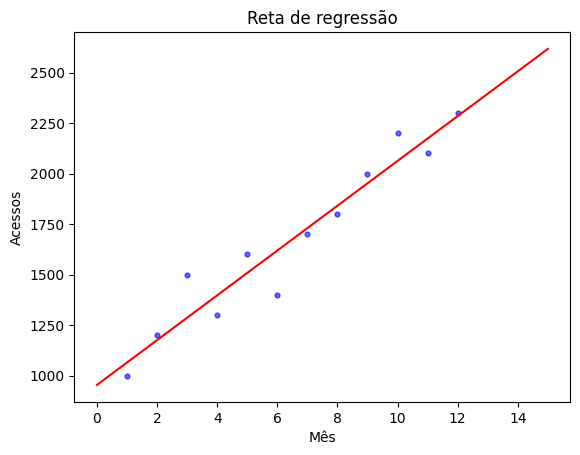

In [13]:
plt.scatter(y=df.Acessos, x=df.Mês, color='blue', s=12, alpha=0.6)
X_plot = np.linspace(0, 15)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Acessos')
plt.xlabel('Mês')
plt.show()

# Regressão polinomaial com Numpy

**y = b2.x^2 + b1.x + b0**

In [14]:
modelo2 = np.poly1d(np.polyfit(df.Mês, df.Acessos, 2))

In [15]:
y2 = modelo2(df.Mês)
y2

array([1085.98901099, 1185.58941059, 1287.43756244, 1391.53346653,
       1497.87712288, 1606.46853147, 1717.30769231, 1830.39460539,
       1945.72927073, 2063.31168831, 2183.14185814, 2305.21978022])

In [16]:
modelo2.coef

array([  1.12387612,  96.22877123, 988.63636364])

In [23]:
print("Equação: Acessos = {:.1f}*Mês^2 + {:.1f}*Mês + {:.1f}".format(modelo2.coef[0], modelo2.coef[1], modelo2.coef[2]))

Equação: Acessos = 1.1*Mês^2 + 96.2*Mês + 988.6


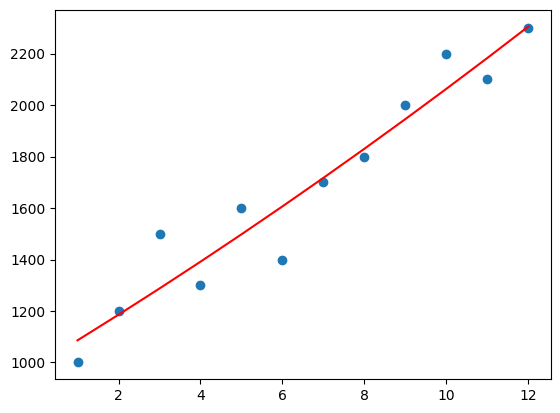

In [24]:
plt.scatter(df.Mês, df.Acessos)
plt.plot(df.Mês,y2,color='red');


In [25]:
# Coeficiente de determinação
np.corrcoef(modelo2)**2

1.0